In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 점수: 45.27604

In [3]:
df = pd.read_csv('./따릉이/train.csv')

* id 고유 id
* hour 시간
* temperature 기온
* precipitation 비가 오지 않았으면 0, 비가 오면 1
* windspeed 풍속(평균)
* humidity 습도
* visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone 오존
* pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count 시간에 따른 따릉이 대여 수

## 기본적인 정보 조회

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [31]:
df.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [32]:
df.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### 기초 처리

* precipitation은 Boolean이므로, True, False로 바꾸자
* 결측값 처리 방안 고민
    * 2개의 결측값이 있는 행은 삭제를 고려
    * 5% 이상을 차지하는 행들의 대치 방안, 삭제 고려

In [6]:
df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [23]:
# 2개짜리 결측값이 있는 column들은 모두 동일 index이므로 제거하기로 한다
df[df['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
# 가장 결측값이 많은 hour_bef_pm2.5 는, 나머지 값도 na인게 많이 분포한다
df[df['hour_bef_pm2.5'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
33,56,21,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN,127.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
100,149,16,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN,102.0
...,...,...,...,...,...,...,...,...,...,...,...
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0
1378,2066,11,10.1,0.0,1.5,59.0,990.0,0.015,39.0,NaN,78.0
1391,2086,1,11.5,0.0,3.2,23.0,2000.0,NaN,NaN,NaN,42.0
1398,2096,20,14.0,0.0,2.9,35.0,910.0,0.061,NaN,NaN,117.0


### 결측값에 대한 솔루션

In [33]:
df['hour_bef_pm2.5'].describe()

count    1342.000000
mean       30.327124
std        14.713252
min         8.000000
25%        20.000000
50%        26.000000
75%        37.000000
max        90.000000
Name: hour_bef_pm2.5, dtype: float64

In [34]:
df['hour_bef_pm10'].describe()

count    1369.000000
mean       57.168736
std        31.771019
min         9.000000
25%        36.000000
50%        51.000000
75%        69.000000
max       269.000000
Name: hour_bef_pm10, dtype: float64

In [40]:
df['count'].describe()

count    1459.000000
mean      108.563400
std        82.631733
min         1.000000
25%        37.000000
50%        96.000000
75%       150.000000
max       431.000000
Name: count, dtype: float64

In [41]:
# 전체 평균과는 차이가 좀 있음
df['count'][df['hour_bef_pm10'].isna()].describe()

count     90.000000
mean      81.366667
std       75.931141
min        1.000000
25%       38.250000
50%       53.000000
75%       97.250000
max      402.000000
Name: count, dtype: float64

In [39]:
# 마찬가지로 전체 평균과는 차이가 좀 있음
df['count'][df['hour_bef_pm2.5'].isna()].describe()

count    117.000000
mean      78.700855
std       71.856810
min        1.000000
25%       37.000000
50%       56.000000
75%       98.000000
max      402.000000
Name: count, dtype: float64

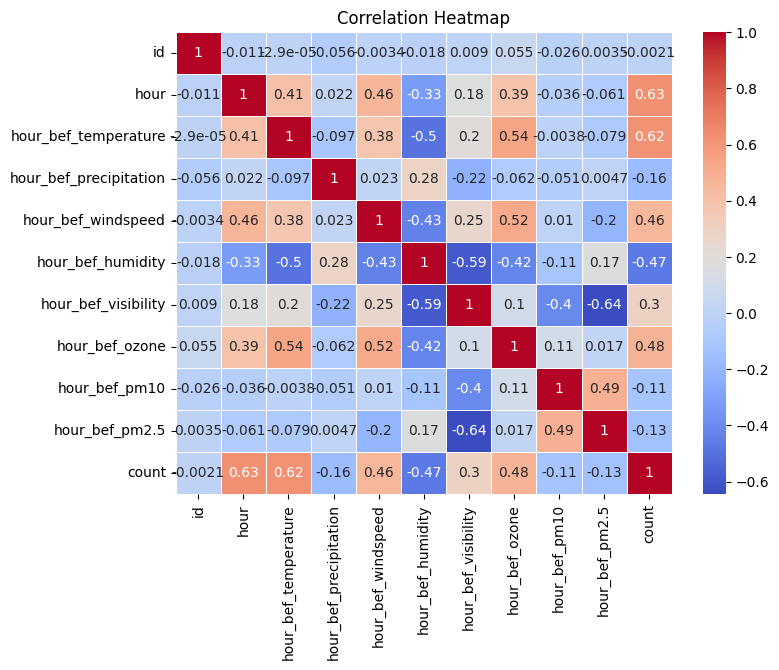

In [44]:
# 히트맵으로 corr을 확인해보기
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 미세먼지 수치는 그날의 visibility와 연관성이 높은 편이다
# 가시성이 유사한 데이터들을 참조해서 대치하는 걸 고려 가능
# Ozone값도 결측치가 많지만, count와의 연관성이 상당히 높은 편이다
# 온도와 풍속, 시간을 고려해서 채우는 걸 고려해보자

In [46]:
for col in ['hour_bef_pm10', 'hour_bef_pm2.5']:
    if pd.isna(df[col]).any():  # 결측값이 있는 경우에만 처리
        similar_rows = df[(df['hour_bef_visibility'] >= df['hour_bef_visibility'] * 0.9) & (df['hour_bef_visibility'] <= df['visibility'] * 1.1)]
        df[col].fillna(similar_rows[col].mean(), inplace=True)

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7404\3742166662.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(similar_rows[col].mean(), inplace=True)


In [49]:
df.isna().sum()

id                         0
hour                       0
hour_bef_temperature       2
hour_bef_precipitation     2
hour_bef_windspeed         9
hour_bef_humidity          2
hour_bef_visibility        2
hour_bef_ozone            76
hour_bef_pm10              0
hour_bef_pm2.5             0
count                      0
dtype: int64

In [53]:
if pd.isna(df['hour_bef_ozone']).any():  # 결측값이 있는 경우에만 처리
        similar_rows = df[(df['hour_bef_temperature'] >= df['hour_bef_temperature'] * 0.9) & (df['hour_bef_temperature'] <= df['hour_bef_temperature'] * 1.1)]
        df['hour_bef_ozone'].fillna(similar_rows[col].mean(), inplace=True)

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7404\3919074579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hour_bef_ozone'].fillna(similar_rows[col].mean(), inplace=True)


In [54]:
df.isna().sum()

id                        0
hour                      0
hour_bef_temperature      2
hour_bef_precipitation    2
hour_bef_windspeed        9
hour_bef_humidity         2
hour_bef_visibility       2
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [55]:
df = df.dropna()

In [58]:
df.to_csv('./submission.csv')

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
train = df
test = pd.read_csv('./따릉이/test.csv')

In [64]:
test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [65]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)
pred = model.predict(test)

In [66]:
submission = pd.read_csv('./따릉이/submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [67]:
submission['count'] = pred

In [68]:
submission

,id,count
0,0,94.40
1,1,238.33
2,2,78.32
3,4,28.56
4,5,72.92
...,...,...
710,2148,56.19
711,2149,66.17
712,2165,124.96
713,2166,162.66


In [69]:
submission.to_csv('베이스라인.csv',index = False)